# EDA & PREDICTION ON HOUSE AND PROPERTY PRICES IN PUNE USING MACHINE LEARNING

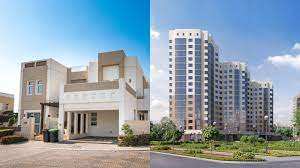

# Study of Existing Systems:
In the past, the real estate industry relied on outdated methods to analyze price trends, such as simple regression analysis, which leads to inaccurate predictions.

Current systems used by real estates are not accurate, which means an improper evaluation of properties that leads to underpricing or overpricing.

# Main Objective:
The main agenda of this project is:

Perform extensive Exploratory Data Analysis(EDA) on the price prediction

Our aim is to bridge the gap between the market offer of properties and the actual value they hold, ensuring accurate and up-to-date estimates of prices using machine learning algorithms that undergo rigorous testing and evaluation for user convenience and utility.

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Importing the data and assinging it to the variable data

In [2]:
df=pd.read_csv('C:/Users/Pradeep/Desktop/Pune_property_data.csv')

# Access the first five rows of the data

In [3]:
df.head()

,Unnamed: 0,additionalrooms,age,amenitiesavailable,amenitiesnot,area,balconies,bathroom,bhk,carpetarea,...,opensides,overlooking,ownership,possesiondate,price,pricepersquare,projectname,roadfaceing,status,totalfloor
0,0,NaN,2 - 3 years,"Lift Available,Car Parking,Power Backup,Indoor...","24 X 7 Security,Children's play area,Club Hous...","1,611 sq ft",2,3,3 BHK Apartment,1209 sq ft,...,2,Road View,Co-Operative Society,NaN,27000000,"₹ 16,759/ sq ft",Bhansali Prive Rio,40 feet,Ready to move,6
1,1,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Sports Facility,Landscape...","1,279 sq ft",NaN,2,2 BHK Apartment,NaN,...,NaN,NaN,Freehold,NaN,7610050,"₹ 5,950/ sq ft",Goel Ganga Platino,NaN,Ready to move,NaN
2,2,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...",Sports Facility,670 sq ft,NaN,1,1 BHK Apartment,NaN,...,NaN,NaN,Freehold,NaN,4100000,"₹ 6,119/ sq ft",Vilas Javdekar Yashwin,NaN,Ready to move,NaN
3,3,NaN,2 - 3 years,"Lift Available,Car Parking,Power Backup,24 X 7...","Sports Facility,Landscaped Gardens",956 sq ft,NaN,2,2 BHK Apartment,615 sq ft,...,NaN,NaN,Freehold,NaN,5736000,"₹ 6,000/ sq ft",Rohan Ishan,NaN,Ready to move,NaN
4,4,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Club House,Swimming Pool,Sports Facility,Joggi...","1,706 sq ft",1,3,3 BHK Apartment,1195 sq ft,...,2,Road View,Freehold,NaN,29002000,"₹ 17,000/ sq ft",Swojas Aavishkar,60 feet,Ready to move,9


# Prints the information about the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37539 entries, 0 to 37538
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          37539 non-null  int64 
 1   additionalrooms     9321 non-null   object
 2   age                 27637 non-null  object
 3   amenitiesavailable  34445 non-null  object
 4   amenitiesnot        34286 non-null  object
 5   area                37518 non-null  object
 6   balconies           21911 non-null  object
 7   bathroom            34667 non-null  object
 8   bhk                 37538 non-null  object
 9   carpetarea          8622 non-null   object
 10  facing              30919 non-null  object
 11  floor               31919 non-null  object
 12  locality            37538 non-null  object
 13  neworold            37538 non-null  object
 14  opensides           11605 non-null  object
 15  overlooking         17140 non-null  object
 16  ownership           28

In [5]:
df.isnull().sum()

Unnamed: 0                0
additionalrooms       28218
age                    9902
amenitiesavailable     3094
amenitiesnot           3253
area                     21
balconies             15628
bathroom               2872
bhk                       1
carpetarea            28917
facing                 6620
floor                  5620
locality                  1
neworold                  1
opensides             25934
overlooking           20399
ownership              9383
possesiondate         32803
price                     1
pricepersquare            1
projectname           13410
roadfaceing           30664
status                 1461
totalfloor            13425
dtype: int64

In [6]:
df=df.drop_duplicates()

# Filling nan and Typecasting

In [7]:
df["area"].value_counts()

1,000 sq ft    700
1,100 sq ft    670
1,500 sq ft    600
1,050 sq ft    515
1,600 sq ft    480
              ... 
4,120 sq ft      1
5,915 sq ft      1
1,794 sq ft      1
3,796 sq ft      1
362 sq ft        1
Name: area, Length: 2380, dtype: int64

In [8]:
df['totalfloor'].unique()

array(['6', nan, '9', '10', '15', '27', '5', '12', '21', '3', '4', '13',
       '23', '24', '16', '31', '14', '19', '22', '18', '7', '2', '11',
       '20', '1', '8', '25', '28', '34', '30', '17', 'totalfloor', '29',
       '26', '35', '32'], dtype=object)

In [9]:
m=df["bathroom"].mode()
m

0    2
Name: bathroom, dtype: object

# Delete the Unnnecessary Columns

In [10]:
df.drop(['additionalrooms','age','amenitiesavailable','amenitiesnot','carpetarea','opensides','overlooking','possesiondate','pricepersquare','projectname','roadfaceing','status'],axis=1,inplace=True)

# Removing string data type to convert into float data type

In [11]:
df['area']=df['area'].str.replace(',','').str.replace('sq ft','').str.replace(' ','')
df['area']=df['area'].str.extract("([\d.]+)").astype(float)


In [12]:
df['balconies']=df['balconies'].str.replace(',','').str.replace('balconies','2').str.replace(' ','')
df['balconies']=df['balconies'].str.extract("([\d.]+)").astype(float)

In [13]:
df['bathroom']=df['bathroom'].str.replace(',','').str.replace('bathroom','2').str.replace(' ','')
df['bathroom']=df['bathroom'].str.extract("([\d.]+)").astype(float)

In [14]:
df['bathroom'].fillna(2.0,inplace=True)

In [15]:
df['bhk'].fillna('2 bhk',inplace=True)

In [16]:
df['facing'].fillna('East',inplace=True)

In [17]:
df['floor']=df['floor'].str.replace(',','').str.replace('floor','2').str.replace(' ','').str.replace('Gr','')
df['floor']=df['floor'].str.extract("([\d.]+)").astype(float)

In [18]:
df['neworold'].fillna('New',inplace=True)

In [19]:
df['ownership'].fillna('Freehold',inplace=True)

In [20]:
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].str.extract("([\d.]+)").astype(float)

# Finding the mean and filling with these values

In [21]:
mn=df['price'].mean()
df['price'].fillna(mn,inplace=True)

In [22]:
df['totalfloor']=df['totalfloor'].str.replace(',','').str.replace('totalfloor','12').str.replace(' ','')
df['totalfloor']=df['totalfloor'].str.extract("([\d.]+)").astype(float)

# Encoding

In [23]:
columns_to_encode=["bhk","facing","locality","neworold","ownership"]
coder=LabelEncoder()
for column in columns_to_encode:
    df[column]=coder.fit_transform(df[column])

In [24]:
df.describe()

,Unnamed: 0,area,balconies,bathroom,bhk,facing,floor,locality,neworold,ownership,price,totalfloor
count,37539.000000,37496.00000,21911.000000,37539.000000,37539.000000,37539.000000,29211.000000,37539.000000,37539.000000,37539.000000,3.753900e+04,24114.000000
mean,18769.000000,1870.05926,1.720506,2.490077,12.760969,0.978236,5.043032,253.817976,0.690056,0.937372,1.474525e+07,10.143941
std,10836.720214,2580.41434,0.744135,1.025970,6.829075,2.121133,3.226065,150.647824,0.463742,0.280797,1.709897e+07,5.057408
min,0.000000,150.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+05,1.000000
25%,9384.500000,982.00000,1.000000,2.000000,10.000000,0.000000,3.000000,141.000000,0.000000,1.000000,5.600000e+06,7.000000
50%,18769.000000,1300.00000,2.000000,2.000000,10.000000,0.000000,4.000000,195.000000,1.000000,1.000000,8.600000e+06,11.000000
75%,28153.500000,2000.00000,2.000000,3.000000,16.000000,1.000000,7.000000,447.000000,1.000000,1.000000,1.600000e+07,12.000000
max,37538.000000,60000.00000,8.000000,9.000000,40.000000,8.000000,34.000000,503.000000,2.000000,4.000000,2.690000e+08,35.000000


In [25]:
mn1=df['balconies'].mean()
df['balconies'].fillna(mn1,inplace=True)

In [26]:
df['area'].mode()

0    1000.0
Name: area, dtype: float64

In [27]:
df['area'].fillna(1000,inplace=True)

In [28]:
z_scre=stats.zscore(df)
z_scre

,Unnamed: 0,area,balconies,bathroom,bhk,facing,floor,locality,neworold,ownership,price,totalfloor
0,-1.732005,-0.100060,4.916334e-01,0.497022,0.474306,2.838975,NaN,-1.067524,-1.488036,-3.338296,0.716705,NaN
1,-1.731912,-0.228789,3.905788e-16,-0.477678,-0.404302,0.481713,NaN,-0.443544,-1.488036,0.223040,-0.417294,NaN
2,-1.731820,-0.464921,3.905788e-16,-1.452378,-1.575779,0.481713,NaN,1.083216,-1.488036,0.223040,-0.622575,NaN
3,-1.731728,-0.354028,3.905788e-16,-0.477678,-0.404302,0.481713,NaN,-1.419342,-1.488036,0.223040,-0.526895,NaN
4,-1.731636,-0.063225,-1.267377e+00,0.497022,0.474306,2.838975,NaN,-1.067524,-1.488036,0.223040,0.833789,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
37534,1.731636,-0.304398,-1.267377e+00,-0.477678,-0.404302,-0.461192,NaN,-1.465809,-1.488036,0.223040,-0.373258,NaN
37535,1.731728,-0.355191,-1.267377e+00,-0.477678,-0.404302,-0.461192,NaN,1.401845,-1.488036,0.223040,-0.491688,NaN
37536,1.731820,-0.252441,-1.267377e+00,-0.477678,-0.404302,-0.461192,NaN,-0.748896,-1.488036,0.223040,-0.388640,NaN
37537,1.731912,-0.308275,-1.267377e+00,-0.477678,-0.404302,-0.461192,NaN,-1.419342,-1.488036,0.223040,-0.407354,NaN


In [29]:
threshold=2
df[(z_scre<threshold).all(axis=1)]

,Unnamed: 0,area,balconies,bathroom,bhk,facing,floor,locality,neworold,ownership,price,totalfloor


In [30]:
df['totalfloor'].mean()

10.143941278925105

In [31]:
df['floor'].fillna(4,inplace=True)

In [32]:
df['totalfloor'].fillna(11,inplace=True)

# Random Forest

# Setting the target variables and independent variables

In [33]:
x=df[['area','balconies','bathroom','bhk','facing','floor','locality','neworold','ownership','totalfloor']]
y=df['price']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
model=RandomForestRegressor(n_estimators=100)

In [36]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
pre=model.predict(x_test)
pre

array([ 7997595.53571429,  8000400.        , 14373000.        , ...,
       11472200.48      ,  7505000.        , 44076333.33333334])

In [38]:
model.score(x_test,y_test)

0.9327499516023259

In [39]:
comparison=pd.DataFrame({"ACTUAL":y_test,"predicted":pre})

In [40]:
comparison

,ACTUAL,predicted
27188,8300000.0,7.997596e+06
1332,7800000.0,8.000400e+06
853,14400000.0,1.437300e+07
17767,9000000.0,8.450000e+06
20752,7200000.0,8.787474e+06
...,...,...
5144,7879000.0,1.055330e+07
25540,6000000.0,5.870000e+06
34214,8500000.0,1.147220e+07
2385,7600000.0,7.505000e+06


## linear regression

#### Applying pca

In [41]:
pc=PCA(n_components=4)
pc.fit_transform(x)

array([[-2.57108257e+02, -1.62331304e+02, -2.43655984e+00,
        -5.48980062e+00],
       [-5.89659472e+02, -7.02872882e+01,  2.95786553e+00,
        -8.99091554e-01],
       [-1.20000982e+03,  1.56129615e+02,  1.01021169e+01,
         6.78964276e-01],
       ...,
       [-6.50386508e+02, -1.16658089e+02,  2.55361282e+00,
         1.95223531e+00],
       [-7.93787952e+02, -2.18505597e+02,  2.73966167e+00,
         1.68732649e+00],
       [ 2.69328622e+03, -2.19949686e+02, -7.71302263e+00,
         1.36243364e-01]])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [44]:
pred=model1.predict(x_test)
pred

array([ 8353364.52641368,  9004286.26603689, 45666309.01486568, ...,
       18225470.81196114, 10597724.090756  , 42569854.42164581])

In [45]:
model1.score(x_test,y_test)

0.5302340054234251

## Decision tree

In [46]:
reg=DecisionTreeRegressor()

In [47]:
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
pred1=reg.predict(x_test)

In [49]:
pred1

array([ 7832000.,  8050000., 14400000., ...,  9000000.,  7600000.,
       51600000.])

In [50]:
reg.score(x_test,y_test)

0.8919845510923485

# SVM

In [51]:
from sklearn.svm import SVR #support vector machines

In [52]:
reg2=SVR()

In [53]:
reg2.fit(x_train,y_train)

SVR()

In [54]:
pred2=reg2.predict(x_test)

In [55]:
pred2

array([8500117.76947002, 8500118.62101751, 8502863.55583132, ...,
       8500910.84231712, 8499821.9905383 , 8506331.020698  ])

In [63]:
reg2.score(x_test,y_test)

-0.13266705934484113

## Gradient boosting 

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
model2=GradientBoostingRegressor()
model2.fit(x_train,y_train)

GradientBoostingRegressor()

In [60]:
predctd=model2.predict(x_test)

In [61]:
predctd

array([ 6079856.70484414,  6097804.36489948, 14224828.16009359, ...,
        9780885.06674614,  5196751.22254616, 44924911.50968939])

In [62]:
model2.score(x_test,y_test)

0.8777078022889169